# 문제 1

### (1) 데이터를 hobby(판다스 시리즈)에 저장하기.

In [ ]:
import pandas as pd

a=['Hiking','Fishing','Golf','Reading','Gaming','Hiking',
   'Fishing','Swimming','Hiking','Fishing','Swimming','Golf',
   'Reading','Gaming','Swimming','Hiking','Music','Music']

hobby=pd.Series(a) #리스트인 a를 Series로 만들어서 hobby라는 변수에 저장.
hobby

,0
0,Hiking
1,Fishing
2,Golf
3,Reading
4,Gaming
5,Hiking
6,Fishing
7,Swimming
8,Hiking
9,Fishing


### (2) 도수 분포표 작성하기

In [ ]:
hobby.value_counts() #value_counts()를 통해 도수분포표 생성, 판다스에서는 세로 방향으로 결과 출력.

,count
Hiking,4
Fishing,3
Swimming,3
Golf,2
Reading,2
Gaming,2
Music,2


### (3) 도수분포표를 막대그래프, 원그래프로 시각화.

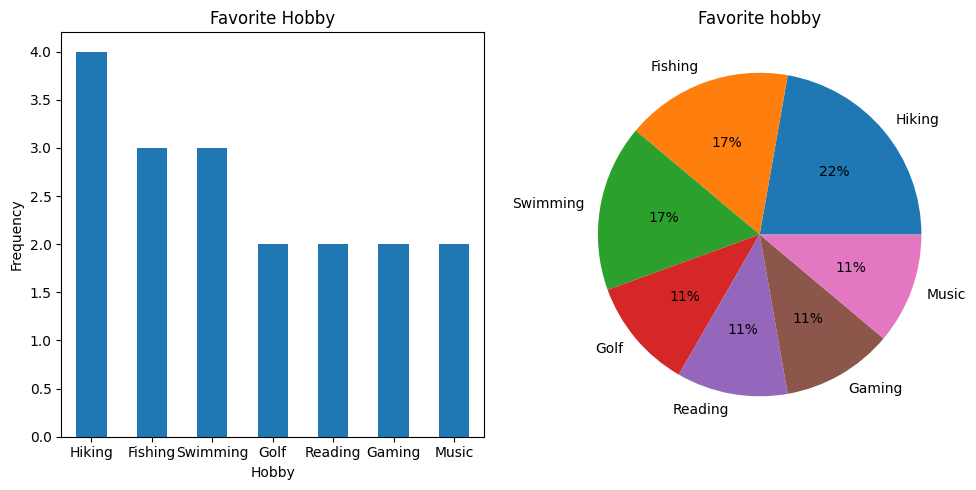

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(ncols=2, figsize=(10, 5)) # ncols=2; 두 개의 서브플롯 생성

fh=hobby.value_counts()
# 첫 번째 영역 막대그래프 정의
fh.plot.bar(xlabel='Hobby',ylabel='Frequency', rot=0, title='Favorite Hobby',ax=axes[0])
# 두 번째 영역 원그래프 정의, autopct='%1.0f%%' 소숫점 이하 자릿수는 표기X
fh.plot.pie(ylabel='',autopct='%1.0f%%',title='Favorite hobby',ax=axes[1])
# 그래프 겹칩 방지.
plt.tight_layout()
plt.show()

#문제 2

### (1) BostonHousing dataset에서 집값 데이터만 추출해 house_price에 저장.

In [ ]:
import pandas as pd
b=pd.read_csv("BostonHousing.csv")
house_price=b['medv'] #BostonHousing dataframe에서 'medv'열만 따로 추출.
house_price

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


### (2) 집값의 평균,중앙값,사분위수.

In [ ]:
print(house_price.mean()) #평균
print(house_price.median()) #중앙값
print(house_price.quantile()) #사분위수

22.532806324110677
21.2
21.2


### (3) 사분위수를 기준으로 4개 구간의 집값 평균과 막대그래프 시각화.

In [ ]:
house_price.describe() #사분위수 구간 확인 25%/50%/75%

,medv
count,506.000000
mean,22.532806
std,9.197104
min,5.000000
25%,17.025000
50%,21.200000
75%,25.000000
max,50.000000


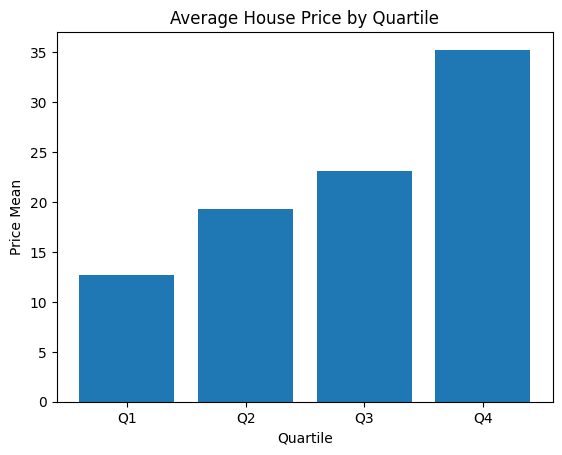

In [ ]:
# describe()에서 확인한 값으로 구간별 데이터 추출
# Q1: 25% 이하 (17.025 이하)
group_q1 = house_price[house_price <= 17.025]

# Q2: 25% 초과 ~ 50% 이하 (17.025 < x <= 21.2)
# house_price > 17.025의 결과는 수천개의 True/False의 리스트이므로 and로 표현 불가,
#&(비트연산자)를 사용해야함
group_q2 = house_price[(house_price > 17.025) & (house_price <= 21.2)]

# Q3: 50% 초과 ~ 75% 이하 (21.2 < x <= 25.0)
group_q3 = house_price[(house_price > 21.2) & (house_price <= 25.0)]

# Q4: 75% 초과 (25.0 초과)
group_q4 = house_price[house_price > 25.0]

# 2. 각 그룹의 평균(mean) 계산
means = [group_q1.mean(), group_q2.mean(), group_q3.mean(), group_q4.mean()]
labels = ['Q1', 'Q2', 'Q3', 'Q4']

# 3. 막대그래프 시각화
# means가 리스트이므로 means.plt.bar가 아니라 plt.bar() 함수 안에 데이터를 넣어야 함
# x축: labels , y축: means.
plt.bar(labels, means)

# 이런 경우 축 이름 설정은 plt.bar 안이 아니라, 별도 함수로 정의
plt.xlabel("Quartile")
plt.ylabel("Price Mean")
plt.title("Average House Price by Quartile")

plt.show()

### (4) 집값의 분포를 상자그림으로 시각화.

<Axes: >

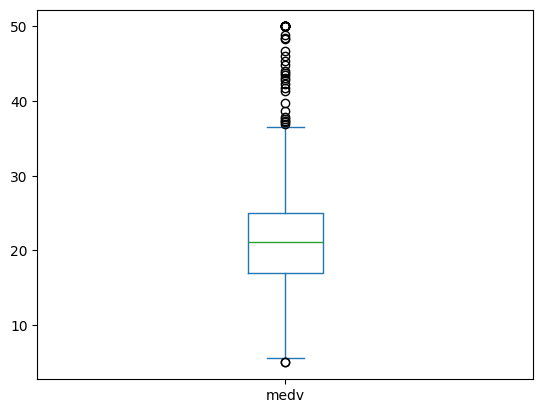

In [ ]:
house_price.plot.box() # 최솟값을 넘어가는 이상치보다
# 최댓값을 넘어가는 이상치가 굉장히 많을 것을 관찰할 수 있음.

### (5) 집값의 분포를 히스토그램으로 시각화.

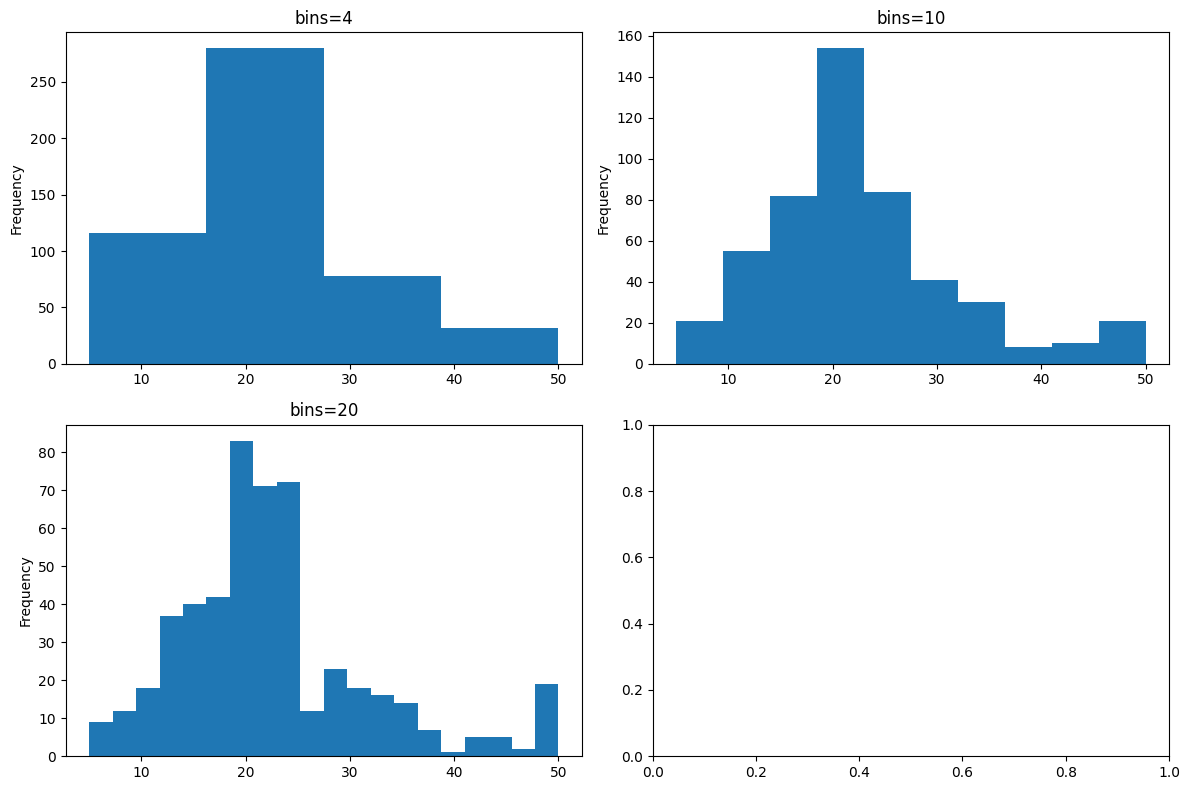

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8)) #4개로 영역을 분할

house_price.plot.hist(bins=4, title='bins=4', ax=axes[0,0]) #4개의 구간으로 나눔
house_price.plot.hist(bins=10, title='bins=10', ax=axes[0,1]) #10개의 구간으로 나눔
house_price.plot.hist(bins=20, title='bins=20', ax=axes[1,0]) #20개의 구간으로 나눔

plt.tight_layout()
plt.show()

구간을 더 자세하게 나눌수록 데이터의 미세한 변화와 숨겨진 패턴을 찾아낼 수 있음. 하지만 전체적인 흐름을 파악하기 어렵워짐.
이와는 반대로, 구간을 크게 나누면 데이터의 전반적인 경향성을 한눈에 파악하기 좋음. 그러나 데이터가 뭉뚱그려져 표현돼 중요한 세부 정보가 사라짐.